<a href="https://colab.research.google.com/github/RyanFerguson989/Colab-Work/blob/main/Ferguson_Ryan-Assignment2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: Ryan Ferguson**

**Undergraduate**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [294]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Wine dataset from sklearn:

In [295]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()


# Question 1 (10 points)

What can you say about the dataset (use code to describe it)? any particular things of interest? Find at least two things that you find interesting.

In [296]:
##### Code block for Question 1
print(wine.DESCR)
print(wine.target_names)
print(wine.feature_names)
print(wine.update)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

3 classes.
13 features.


# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [297]:
##### Code block for Question 2
X = wine.data
y = wine.target
print(len(X))
print(y)
i = 177
for item in y:
  if(item==2):
    X = np.delete(X, (i), axis=0)
    y = np.delete(y, (i), axis=0)
    i=i-1
print(len(X))
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, train_size=0.65, random_state=1234)
print(y_train)
print(y_test)
#why did this take me 4 hours??

178
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
130
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 0]
[1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1
 0 1 1 0 0 1 1 1 1]


# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [298]:
from sklearn.linear_model import Perceptron
##### Code block for Question 3
TrainPerceptron = Perceptron(random_state=1234)
TrainPerceptron.fit(X_train, y_train)
prediction = TrainPerceptron.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
print(accuracy)

0.6739130434782609


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [299]:
##### Code block for Question 4
print(sklearn.metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.64      1.00      0.78        27

    accuracy                           0.67        46
   macro avg       0.82      0.61      0.57        46
weighted avg       0.79      0.67      0.60        46



Our precision for 0 is 100% so we can say none of our predicted 0's are wrong

Our recall for 1 is 100% so all of the 1's is the test data were classified correctly.

With 100% accuracy for one of are classes, we can say that our overall accuracy will be at least 50% assuming we have balanced data.

# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

[[ 4 15]
 [ 0 27]]


<AxesSubplot:>

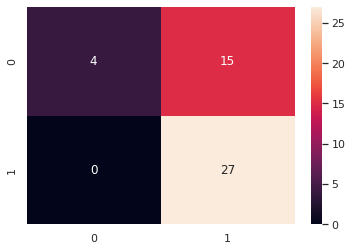

In [300]:
##### Code block for Question 5 - part 1
predictX = TrainPerceptron.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, predictX)
print(cm)
sns.heatmap(cm, annot=True)

In [301]:
##### Code block for Question 5 - part 2


# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 6 a goes here.

Textual answer to question 6 b goes here.

# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [302]:
##### Code block for Question 7
wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, train_size=0.65, random_state=1234)


# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [303]:
from sklearn.tree import DecisionTreeClassifier
##### Code block for Question 8
tree = DecisionTreeClassifier().fit(X_train, y_train)
predict = tree.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, predict)
print(acc)

0.873015873015873


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [304]:
##### Code block for Question 9
print(sklearn.metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.85      0.85      0.85        26
           2       0.90      1.00      0.95        18

    accuracy                           0.87        63
   macro avg       0.88      0.88      0.88        63
weighted avg       0.87      0.87      0.87        63



# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

[[15  4  0]
 [ 2 22  2]
 [ 0  0 18]]


<AxesSubplot:>

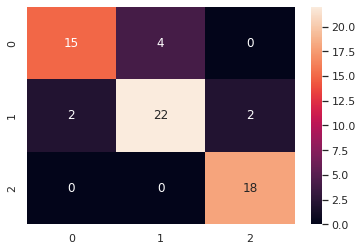

In [305]:
##### Code block for Question 10 - part 1
predict = tree.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, predict)
print(cm)
sns.heatmap(cm, annot=True)


In [306]:
##### Code block for Question 10 - part 2

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

Textual answer to question 11 a goes here.

Textual answer to question 11 b goes here.

In [307]:
##### Code block for Question 11 - part c

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [308]:
##### Code block for Question 12
wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, train_size=0.65, random_state=1234)


# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [309]:
##### Code block for Question 13
logreg = sklearn.linear_model.LogisticRegression(solver='liblinear', random_state=1234)
logreg.fit(X_train, y_train)
predict = logreg.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, predict)
print(acc)


0.9523809523809523


# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [310]:
##### Code block for Question 14
print(sklearn.metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.96      0.92      0.94        26
           2       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63



Our precision for 0 is 100% so we can say none of our predicted 0's are wrong.

Our recall for 2 is 100% so all of the 2's is the test data were classified correctly.

With 100% accuracy for one of are classes, we can say that our overall accuracy will be at least 33% assuming we have balanced data.

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

[[18  1  0]
 [ 0 24  2]
 [ 0  0 18]]


<AxesSubplot:>

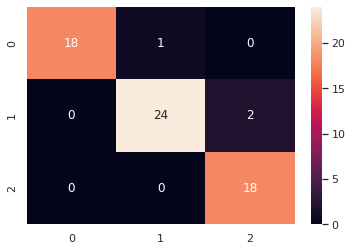

In [311]:
##### Code block for Question 15 - part 1
predict = logreg.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, predict)
print(cm)
sns.heatmap(cm, annot=True)

In [312]:
##### Code block for Question 15 - part 2

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 16 a goes here.

Textual answer to question 16 b goes here.

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [313]:
##### Code block for Question 17

Textual answer to question 17 goes here.

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


In [314]:
##### Code block for Graduate Student Question